In [1]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'time in [$µs$]')

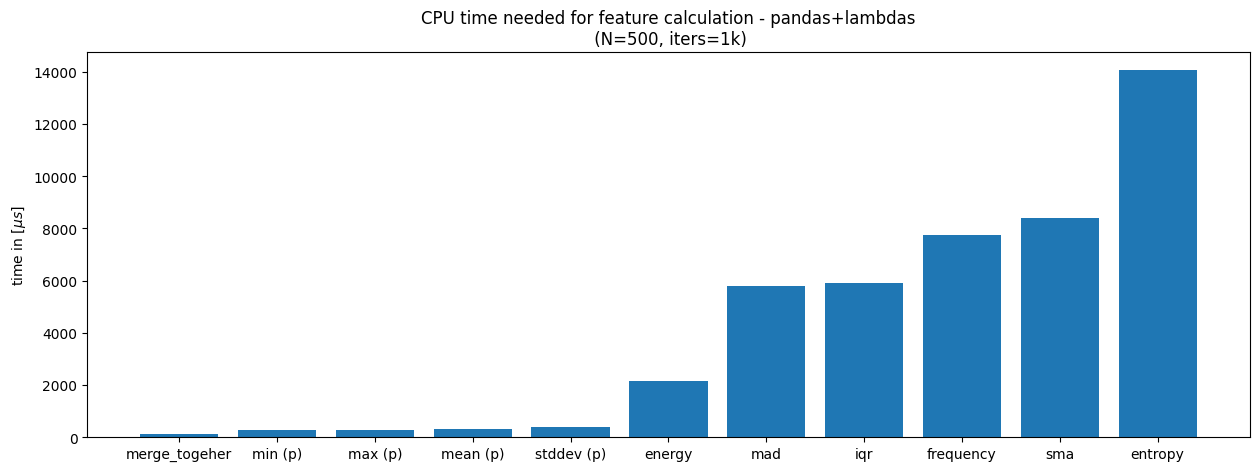

In [71]:
data = {
    "mean (p)": 318.7,
    "stddev (p)": 397.1,
    "mad": 5784.4,
    "min (p)": 270.1,
    "max (p)": 282.1,
    "sma": 8383.7,
    "iqr": 5915.4,
    "entropy": 14049.0,
    "energy": 2146.6,
    "frequency": 7755.0,
    "merge_togeher": 125.2
}


dat2 = {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

plt.rcParams["figure.figsize"] = (15,5)
plt.bar(dat2.keys(), dat2.values())
plt.title("CPU time needed for feature calculation - pandas+lambdas\n (N=500, iters=1k)")
plt.ylabel("time in [$µs$]")

In [60]:
import time
import math
from timeit import timeit

import numpy as np
import scipy as scp

In [37]:
np_data = np.random.randn(500)
np_timestamps = np.array(list(range(500)))

In [61]:
t_1 = time.time()
for i in range(10000):
    # np.mean(np_data) # mean
    # np.std(np_data) # stddev
    # np.min(np_data) # min
    # np.max(np_data) # max
    # scp.stats.median_abs_deviation(np_data) # MAD
    # scp.integrate.simpson(y=np.abs(np_data), x=np_timestamps) # SMA
    # np.subtract(*np.percentile(np_data, [75, 25])) # iqr
    # scp.stats.entropy(np_data) # entropy
    # np.average(np.power(np_data, 2)) # energy

    # FFT-Stuff

    bands_data = scp.fft.fft(np_data)
    energy_spectrum = np.abs(bands_data[:len(bands_data)//2])**2
    band_width = math.ceil(len(bands_data) / (8 * 2))
    bands_energy = {}
    for i in range(8):
        if i == 0: # ignore the DC-Part of FFT
            s_idx = 1
        else:
            s_idx = i * band_width
        e_idx = min(len(energy_spectrum), (i+1)*band_width)
        subband_energy = np.sum(energy_spectrum[s_idx:e_idx])


t_2 = time.time()

print(f"delta={(t_2-t_1)*100:.3f}µs")

delta=41.273µs


In [62]:
data = {
    "mean": 18.795,
    "stddev": 30.305,
    "mad": 54.564,
    "min": 17.045,
    "max": 17.030,
    "sma": 88.915,
    "iqr": 62.180,
    "entropy": 190.739,
    "energy": 13.827,
    "frequency": 41.273,
    "merge_togeher": 0.0
}

Text(0, 0.5, 'time in [$µs$]')

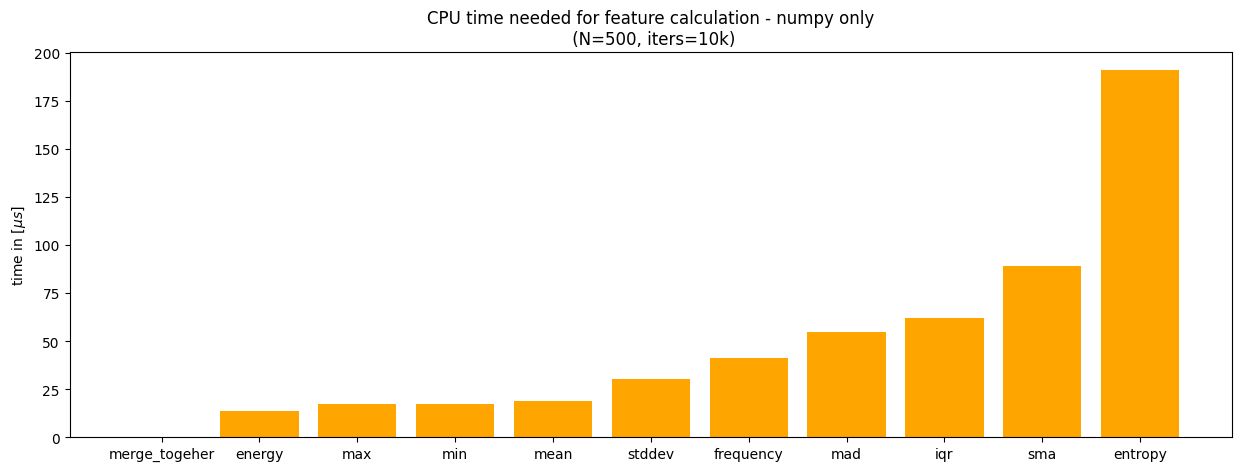

In [69]:
dat2 = {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

plt.rcParams["figure.figsize"] = (15,5)
plt.bar(dat2.keys(), dat2.values(), color="orange")
plt.title("CPU time needed for feature calculation - numpy only\n (N=500, iters=10k)")
plt.ylabel("time in [$µs$]")